# K-Nearest Neighbors 分類
資料不多時最簡單的分類方法，也是一個rule-based的Non-supervised分類方法就是KNN。
下面我們以經典的[Iris分類資料集](https://en.wikipedia.org/wiki/Iris_flower_data_set)說明KNN。

特徵形成的座標空間稱為特徵空間，像是經典的Iris分類資料集中，萼片長、萼片寬、花瓣長度三個資訊可以形成一個三維特徵空間。

KNN假設K個在特徵空間中最鄰近的樣本屬於同一類別，如此一來，testing data任意成員都可以找到最接近的K個training data，並投票決定分類。

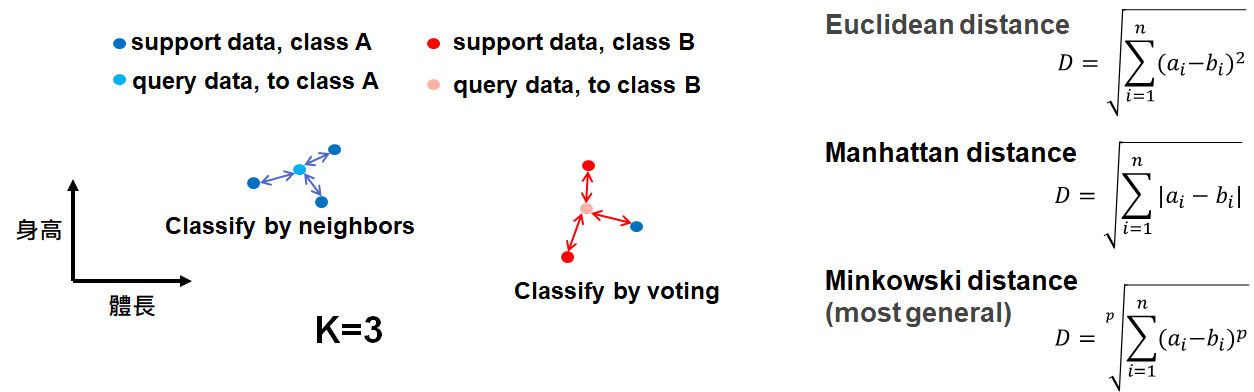

程式內容：
* 載入資料集
* 建立訓練集及測試集
* 建構KNN和預測
* 評估模型
* 與DNN比較
* Exercise



# 載入資料集
* 資料量: 150株鳶尾花之測量值
* 特徵：'sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'
* 類別: 'Virginica': 0, 'Setosa':1, 'Versicolour': 2

In [3]:
# include important libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

首先讀取Iris資料集，檢查資料大小，內容



In [4]:
# import small dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target
print("Data shape:",X.shape)
print("Features:\n",iris.feature_names)
print("Target shape:",y.shape)
print("Classes:\n",iris.target_names)

Data shape: (150, 4)
Features:
 ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target shape: (150,)
Classes:
 ['setosa' 'versicolor' 'virginica']


隨機抽取其中一部分來看，可看出output會是一些分類

In [5]:
# randomly choosing 30 points 
print (y[np.random.choice(len(X), 30)])

[1 1 0 1 1 2 1 2 1 2 0 2 0 0 1 1 0 0 1 2 0 2 0 2 0 2 1 2 1 1]


萼片長、萼片寬、花瓣長度三個資訊可以形成一個三維特徵空間

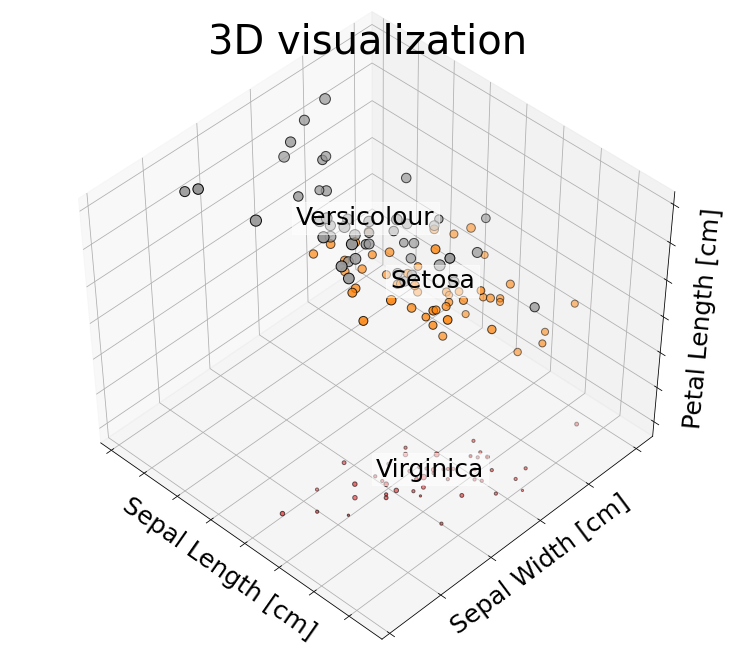

In [7]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(10, 9))
ax = Axes3D(fig, elev=48, azim=134)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s = X[:, 3]*50)

for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean(),
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("Sepal Length [cm]", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Sepal Width [cm]", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Petal Length [cm]", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

**Metric based就是在像這樣的特徵空間上將不同種類做區別，以後想到latent space就要想到這個圖**

Metric learning就是要學出一個好的特徵空間使得不同class在這個空間中可以被分開

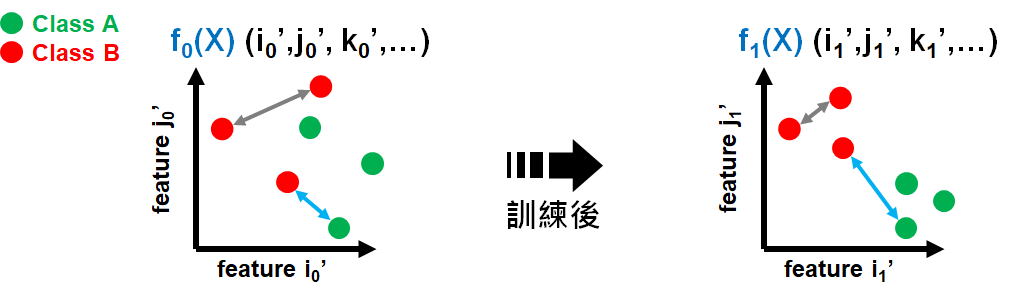

# 建立訓練集及測試集
從sklearn import所需工具，使用train-test-split將資料切分為訓練及測試集，這裡使用2成資料測試模型效果。

在KNN驗算法中，會以訓練集資料為比較依據做分類。

後對training data做fiting。此後每比testing資料都要以training data為依據做分類

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# 建構KNN和預測
使用sklearn套件KNeighborsClassifier建立KNN模型，並且使用切分好的training data做fitting，再來預測testing data分類結果。

In [9]:
from sklearn.neighbors import KNeighborsClassifier
# Instantiate learning model (k = 3)
classifier = KNeighborsClassifier(n_neighbors=3)
# Fitting the model
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# 評估模型

使用sklearn套件評估結果accuracy和confusion matrix

Accuracy of KNN is equal to 96.67 %.


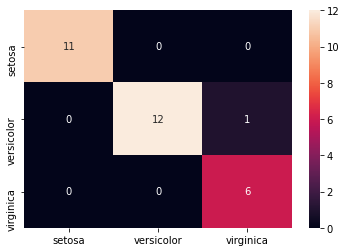

In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
cm = confusion_matrix(y_test, y_pred)
_=sns.heatmap(cm, annot=True,xticklabels=iris.target_names,yticklabels=iris.target_names, fmt="d")
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of KNN is equal to ' + str(round(accuracy, 2)) + ' %.')

# 與DNN比較
Accuracy十分穩定
相較之下，使用Multi layer perceptron (DNN)在訓練次數低時可能沒有那麼好的效果

一樣使用sklearn的套件，這次是MLPClassifier，並且用training set做訓練

In [11]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(13,13),max_iter=10)
mlp.fit(X_train,y_train)

/opt/conda/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(13, 13), learning_rate='constant',
              learning_rate_init=0.001, max_iter=10, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=None, shuffle=True, solver='adam', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

觀察testing set 預測結果

Accuracy of DNN is equal to 36.67 %.


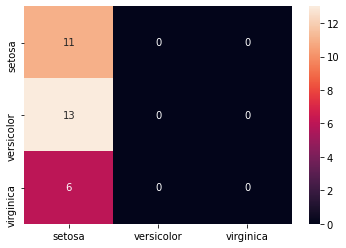

In [12]:
predictions = mlp.predict(X_test)
import seaborn as sns
cm2 = confusion_matrix(y_test, predictions)
_=sns.heatmap(cm2, annot=True,xticklabels=iris.target_names,yticklabels=iris.target_names, fmt="d")
accuracy = accuracy_score(y_test, predictions)*100
print('Accuracy of DNN is equal to ' + str(round(accuracy, 2)) + ' %.')

# Exercise

KNN實際上很吃參數調整。

請使用不同的K看看效果如何。